<a href="https://colab.research.google.com/github/HGuttau/Kaggle/blob/TitanicRandomForest/titanic_missao_georgeIA01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo: Aplicar e treinar vários modelos de Machine Learning.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

In [2]:
df_gender = pd.read_csv('/content/gender_submission.csv')
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

Feito a Upload dos arquivos e transformado para dataset vamos começar a análise exploratória de dados.

#1. Análise Exploratória

In [5]:
df_gender.info()
df_gender.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


(418, 2)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.shape

(891, 12)

Agora que vimos ambos datasets **train** e **gender** podemos analisar e corrigir possíveis problemas com os dados. Vamos entender o que é o dataset gender_submission.

In [9]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [11]:
df_gender['PassengerId'].unique()

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

Seria Gender a forma limpra do test? Vamos confirmar:

In [14]:
df_gender.isnull().sum()

,0
PassengerId,0
Survived,0


In [15]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [16]:
set(df_gender['PassengerId'].unique()) - set(df_test['PassengerId'].unique())

set()

Exato! o set me trouxe a informação que não tem outros dados que não estejam no teste, ou seja é uma forma limpa apenas com o passengerID e se sobreviveu ou não, podemos dizer que é um gabarito. Vamos deixa-lo de lado por enquanto.

In [20]:
df_train['Age'].isna().sum() / df_train.shape[0]

np.float64(0.19865319865319866)

Age é composto de quase 20% de NA. Vou verificar outros para confirmar o estado de cada um dos campos. Vamos começar a categorizar as colunas entre numericas e categóricas.

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [24]:
df_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

Vamos começar copiando o dataset para não perdermos os dados originais e logo em seguida criar colunas necessárias para Sibsp, Parch, Cabin.


In [25]:
train = df_train.copy()

In [27]:
train['HaveCabin'] = train['Cabin'].notna()

O que fizemos é criar o numérico se temos cabine ou não.
Agora vamos criar o tamanho da familia dos passageiros.

In [30]:
train['FamilySize'] = train['SibSp'] + train['Parch']

In [32]:
train['FamilySize'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

<Axes: ylabel='Density'>

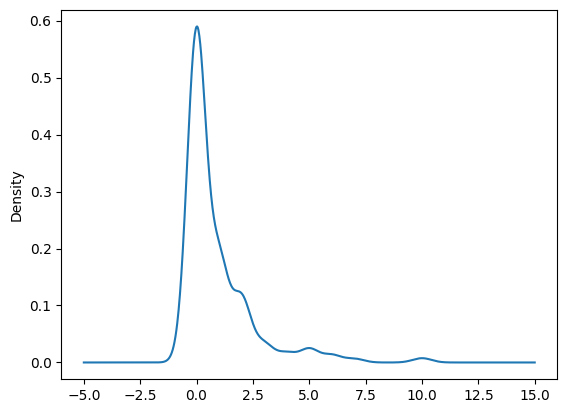

In [34]:
train['FamilySize'].plot(kind='density')

Existem mais passageiros sem familia do que com.

In [35]:
train['FamilySize'].describe()

,FamilySize
count,891.000000
mean,0.904602
std,1.613459
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,10.000000


In [36]:
train['IsAlone'] = train['FamilySize'] == 0

In [41]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [42]:
RareTitles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
              'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
train['Title'] = train['Title'].replace(RareTitles, 'Rare')
train['Title'] = train['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

In [43]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HaveCabin,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,1,False,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,1,False,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,0,True,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,1,False,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,0,True,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False,0,True,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,True,0,True,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False,3,False,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,True,0,True,Mr


Agora que criamos variáveis. Vamos classifica-las para poder montar a pipeline:
Y = Survived
X =
1. Numérica: Pclass, Age, Fare, FamilySize.
2. Categórica: Sex, Embarked, HaveCabin, Is Alone, Title.

#2 Começo das Pipelines

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [44]:
y = train['Survived']
columnsDrop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
x = train.drop(columnsDrop, axis=1)
x

,Survived,Pclass,Sex,Age,Fare,Embarked,HaveCabin,FamilySize,IsAlone,Title
0,0,3,male,22.0,7.2500,S,False,1,False,Mr
1,1,1,female,38.0,71.2833,C,True,1,False,Mrs
2,1,3,female,26.0,7.9250,S,False,0,True,Miss
3,1,1,female,35.0,53.1000,S,True,1,False,Mrs
4,0,3,male,35.0,8.0500,S,False,0,True,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,False,0,True,Rare
887,1,1,female,19.0,30.0000,S,True,0,True,Miss
888,0,3,female,NaN,23.4500,S,False,3,False,Miss
889,1,1,male,26.0,30.0000,C,True,0,True,Mr


In [47]:
pipeline_numerica = Pipeline([
    ('imputer', SimpleImputer(strategy='median') ),
    ('scaler', StandardScaler())
])

pipeline_categorica = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

col_num = ['Age', 'Fare', 'FamilySize']
col_categ = ['Pclass','Sex', 'Embarked', 'HaveCabin', 'IsAlone', 'Title']

In [49]:
transformador = ColumnTransformer([
    ('dados_num', pipeline_numerica, col_num),
    ('dados_cat', pipeline_categorica, col_categ)
])


In [50]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('preprocess', transformador),
    ('forest', RandomForestClassifier(
        n_estimators=100,
        max_depth=8,
        min_samples_leaf=3,
        min_samples_split=5,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

In [52]:
from sklearn.model_selection import train_test_split

x80, x20, y80, y20 = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [54]:
pipeline.fit(x80,y80)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('dados_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare',
                                                   'FamilySize']),
                                                 ('dados_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'HaveCabin', 'IsAlone',
                                                   'Title'])])),
                ('forest',
                 RandomForestClassifier(class_weight='balanced', max_depth=8,
                                        min_samples_leaf=3, min_samples_split=5,
                                        n_jobs=-1, random_state=42))])

In [57]:
y_pred = pipeline.predict(x20)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [64]:
print(f'Accurácia Registrada: {100 * (accuracy_score(y20, y_pred)) :.2f} %')

Accurácia Registrada: 79.89 %


In [67]:
confusion_matrix(y20, y_pred)

array([[91, 19],
       [17, 52]])

In [68]:
print(classification_report(y20, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       110
           1       0.73      0.75      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

